<a href="https://colab.research.google.com/github/oceam/agri-image/blob/main/codes/test_teachable_machine_model_20231212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, Please bring your model from Google Teachable Machine  
the name of your model should like "keras_model.h5"  
Reference: [model export](https://teachablemachine.withgoogle.com/faq#%E4%BF%9D%E5%AD%98%E3%81%A8%E3%82%A8%E3%82%AF%E3%82%B9%E3%83%9D%E3%83%BC%E3%83%88)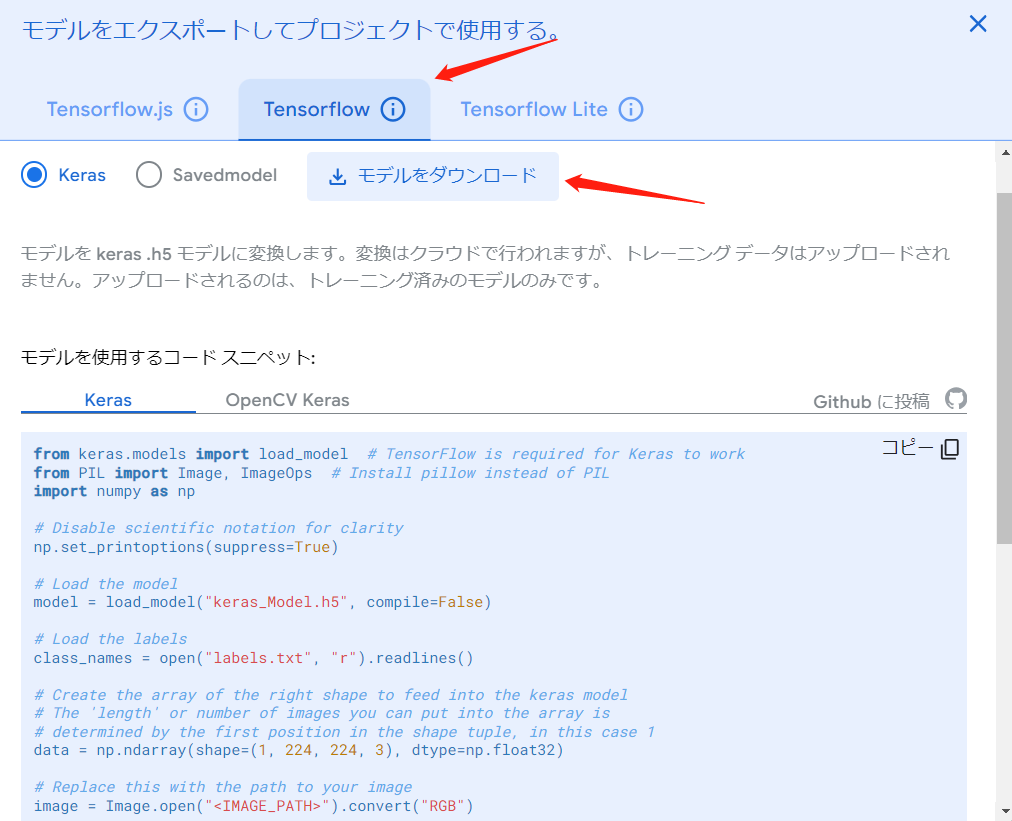

In [1]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

In [4]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()


In [5]:
# check class
class_names

['0 hakidamegiku\n',
 '1 hosoaogeitou\n',
 '2 ichibi\n',
 '3 inubie\n',
 '4 kosendangusa\n',
 '5 mameasagao\n',
 '6 mehishiba\n',
 '7 ohishiba\n',
 '8 oinutade\n',
 '9 shiroza\n']

In [6]:
# check your model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 10)                129100    
                                                                 
Total params: 539308 (2.06 MB)
Trainable params: 525228 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [7]:
from google.colab import files
uploaded = files.upload()

Saving test.zip to test.zip


In [8]:
!unzip test.zip
%ls

Archive:  test.zip
  inflating: test/hakidamegiku_IMG_1546_3.jpg  
  inflating: test/hakidamegiku_IMG_1573_1.jpg  
  inflating: test/hosoaogeitou_IMG_1598_18.jpg  
  inflating: test/mehishiba_IMG_1635_37.jpg  
  inflating: test/mehishiba_IMG_1726_7.jpg  
keras_model.h5  labels.txt  sample_data/  test/  test.zip


In [10]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/test/hakidamegiku_IMG_1546_3.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 0s 37ms/step
Class: hakidamegiku
Confidence Score: 0.99872965


<ipython-input-10-4fb8d3ebd5d7>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


Creat a new folder, may be call it "test"  
then upload the test images that you want to check.

In [11]:
import os
# read and show multiple image
imgfolder=r'test/'
for image in os.listdir(imgfolder):
 print(image)

hosoaogeitou_IMG_1598_18.jpg
mehishiba_IMG_1635_37.jpg
hakidamegiku_IMG_1573_1.jpg
hakidamegiku_IMG_1546_3.jpg
mehishiba_IMG_1726_7.jpg


In [12]:
from skimage import io
img_list = io.imread_collection("test/*.jpg")
img_list.files

['test/hakidamegiku_IMG_1546_3.jpg',
 'test/hakidamegiku_IMG_1573_1.jpg',
 'test/hosoaogeitou_IMG_1598_18.jpg',
 'test/mehishiba_IMG_1635_37.jpg',
 'test/mehishiba_IMG_1726_7.jpg']

Check if you model works good for test image.

In [13]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

for img_name in img_list.files:
  image = Image.open(img_name)
  #resize the image to a 224x224 with the same strategy as in TM2:
  #resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  #turn the image into a numpy array
  image_array = np.asarray(image)
  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  # Load the image into the array
  data[0] = normalized_image_array
  # run the inference
  prediction = model.predict(data)
  index = np.argmax(prediction)
  class_name = class_names[index]
  confidence_score = prediction[0][index]

  # prediction = model.predict(data)
  # judge_idx=np.argmax(prediction)
  print('the GTclass_name is :', img_name[5:-4])
  print('the PreDclass_name is :', class_name)
  print('the confidence_score is :', confidence_score)

1/1 [==============================] - 0s 36ms/step
the GTclass_name is : hakidamegiku_IMG_1546_3
the PreDclass_name is : 0 hakidamegiku

the confidence_score is : 0.99862754
1/1 [==============================] - ETA: 0s

<ipython-input-13-ff9ae57b90d4>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


1/1 [==============================] - 0s 41ms/step
the GTclass_name is : hakidamegiku_IMG_1573_1
the PreDclass_name is : 0 hakidamegiku

the confidence_score is : 0.99222445
1/1 [==============================] - 0s 44ms/step
the GTclass_name is : hosoaogeitou_IMG_1598_18
the PreDclass_name is : 1 hosoaogeitou

the confidence_score is : 0.9999987
1/1 [==============================] - 0s 46ms/step
the GTclass_name is : mehishiba_IMG_1635_37
the PreDclass_name is : 6 mehishiba

the confidence_score is : 0.99994874
1/1 [==============================] - 0s 37ms/step
the GTclass_name is : mehishiba_IMG_1726_7
the PreDclass_name is : 6 mehishiba

the confidence_score is : 0.99930406


# Practice: Save all the result to csv
by chatgpt

In [14]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import csv

# Assuming you have loaded your model and data
# model = load_model('your_model.h5')
# img_list = YourImageList
# class_names = YourClassNames

results = []

for img_name in img_list.files:
    image = Image.open(img_name)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    gt_class_name = img_name[5:-4]
    results.append([img_name, gt_class_name, class_name, confidence_score])

# Writing to a CSV file
with open('predictions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image Name', 'Ground Truth Class', 'Predicted Class', 'Confidence Score'])
    writer.writerows(results)


1/1 [==============================] - 0s 36ms/step


<ipython-input-14-b8cc43666dbc>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


1/1 [==============================] - 0s 37ms/step
